Real estate price prediction

In [80]:
# Import necessary libraries
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [81]:
# Load the preprocessed dataset
data = pd.read_csv('Real estate.csv')

EDA


In [82]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [83]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [84]:
data.shape

(414, 8)

In [85]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [87]:
data.rename(columns ={'X2 house age':'house_age'},inplace=True)
data.rename(columns ={'X3 distance to the nearest MRT station':'distance_to_the_nearest_MRT_station'},inplace=True)
data.rename(columns ={'X4 number of convenience stores':'number_of_convenience_stores'},inplace=True)
data.rename(columns ={'X5 latitude':'latitude'},inplace=True)
data.rename(columns ={'X6 longitude':'longitude'},inplace=True)
data.rename(columns ={'Y house price of unit area':'house_price_of_unit_area'},inplace=True)
data.rename(columns ={'X1 transaction date':'transaction_date'},inplace=True)
#We change the column names.

In [88]:
data["transaction_date"]=data["transaction_date"].astype("int") #We change the type of data in transaction_date to integer.

In [89]:
data['transaction_date'].value_counts()

transaction_date
2013    288
2012    126
Name: count, dtype: int64

In [90]:
abs(data.corr()["house_price_of_unit_area"].sort_values(ascending=False)) #We look at their correlations.

house_price_of_unit_area               1.000000
number_of_convenience_stores           0.571005
latitude                               0.546307
longitude                              0.523287
transaction_date                       0.081545
No                                     0.028587
house_age                              0.210567
distance_to_the_nearest_MRT_station    0.673613
Name: house_price_of_unit_area, dtype: float64

In [64]:
data = data.dropna()
data.isnull().sum()

No                                     0
transaction_date                       0
house_age                              0
distance_to_the_nearest_MRT_station    0
number_of_convenience_stores           0
latitude                               0
longitude                              0
house_price_of_unit_area               0
dtype: int64

In [91]:
data.loc[30]

No                                       31.00000
transaction_date                       2013.00000
house_age                                25.90000
distance_to_the_nearest_MRT_station    4519.69000
number_of_convenience_stores              0.00000
latitude                                 24.94826
longitude                               121.49587
house_price_of_unit_area                 22.10000
Name: 30, dtype: float64

In [66]:
data = data.copy()

Regression

In [92]:
x,y=data.drop(["No","house_price_of_unit_area","transaction_date"],axis=1),data[["house_price_of_unit_area"]]
x=scaler.fit_transform(x)
x.shape

(414, 5)

In [93]:
X = data.iloc[:, 3:7].values
y = data.iloc[:, -1].values

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [95]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Assuming you're using all features, you can set x_train as follows:
x_train = iris.data

# Print the shape of x_train to verify
print("Shape of x_train:", x_train.shape)

Shape of x_train: (150, 4)


In [96]:
# Assuming you're using all features, you can set x_train as follows:
x_test = iris.data

# Print the shape of x_train to verify
print("Shape of x_test:", x_test.shape)

Shape of x_test: (150, 4)


In [97]:
model=Sequential()
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [112]:
# Adjust the sizes of y_train and y_test to match the number of samples in x_train and x_test
y_train_aligned = y_train[:len(x_train)]
y_test_aligned = y_test[:len(x_test)]

# Now, both x_train, y_train_aligned, x_test, and y_test_aligned have the same number of samples

# Check the shapes to verify
print("Shape of x_train:", x_train.shape)
print("Shape of y_train_aligned:", y_train_aligned.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test_aligned:", y_test_aligned.shape)


Shape of x_train: (150, 4)
Shape of y_train_aligned: (150,)
Shape of x_test: (150, 4)
Shape of y_test_aligned: (125,)


In [99]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = reg.predict(X_test)
y_pred

array([43.52379904, 40.98101269, 40.4928347 , 40.77854612, 30.79334445,
       46.89753253, 45.82369278, 45.82369278, 28.98209794, 49.10272361,
       34.3710893 , 30.91252294, 36.16575182, 29.04667533, 41.62664813,
       32.27774456, 46.32325274, 43.38952516, 31.1079444 , 43.86703548,
        4.07120323, 33.70331164, 44.71530951, 42.65176444, 12.09010735,
       40.73301189, 13.54807913, 40.4928347 , 42.78916005, 44.48956153,
       12.97670322, 35.926762  , 42.06127023, 28.69467023, 45.83653414,
       37.61991004, 49.10272361, 13.31299713, 50.2504653 , 46.98076956,
       41.29067426, 41.8706632 , 52.3126211 , 39.74061919, 40.98101269,
       46.25472636, 45.04253878, 21.97201098, 45.87872266, 52.30588682,
       43.52379904, 45.05411864, 45.77820297, 45.32564673, 40.19054772,
       13.31299713, 40.33689434, 35.41327675, 30.79334445, 45.82369278,
       30.79791328, 36.01353855, 13.31299713, 13.49048466,  6.98844298,
       33.70331164, 29.03618346, 46.22006699, 40.29865662, 29.03

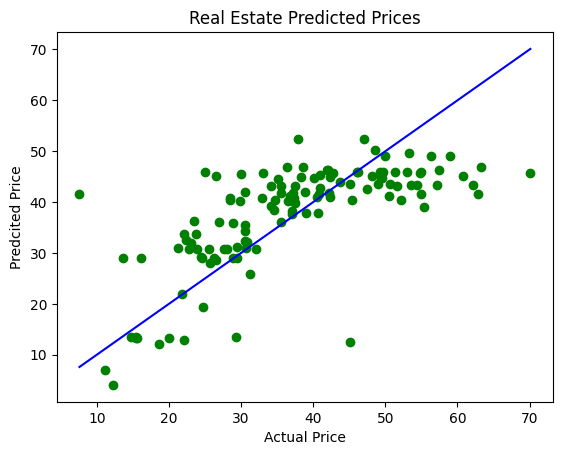

In [101]:
plt.scatter(y_test, y_pred, color = 'green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'blue')
plt.title("Real Estate Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predcited Price")
plt.show()

In [102]:
print(reg.coef_)
print(reg.intercept_)

[-5.01599858e-03  1.02622325e+00  2.38415336e+02 -3.26594919e+01]
-1944.4069555815056


In [103]:
print(reg.predict([[72.987, 7, 24.98034, 121.53951]]))

[48.68802564]
